In [1]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# load eeci_colors from csv
colors_file = 'eeci_colors.csv'
with open (colors_file, 'r') as f:
    reader = csv.reader(f)
    eeci_colors = reader.__next__()

In [3]:
planning_horizon_results_file = os.path.join('..','results', 'evaluate_tests_planning_horizon.csv')
planning_horizon_results = pd.read_csv(planning_horizon_results_file)

In [4]:
taus = [2,3,6,9,12,18,24,32,48,72]
columns = ['Overall','Price','Carbon','Grid']

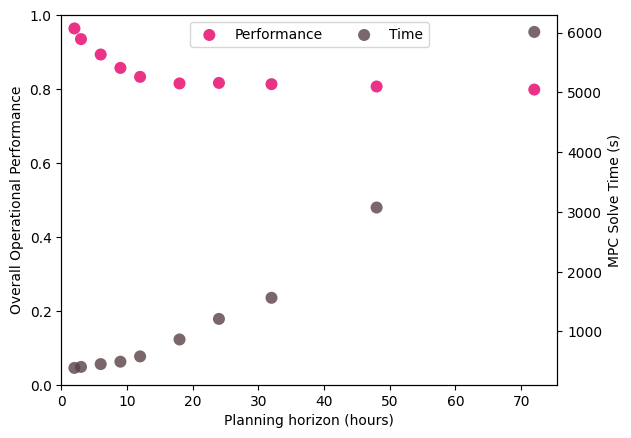

In [5]:
fig, ax = plt.subplots()
ln1 = ax.scatter(taus,planning_horizon_results['Overall'],label='Performance',color=eeci_colors[0], alpha=0.8, edgecolors='none',s=75)
ax2 = ax.twinx()
ln2 = ax2.scatter(taus,planning_horizon_results['Solve Time (s)'],label='Time',color=eeci_colors[7], alpha=0.8, edgecolors='none',s=75)
plt.xlim(0)
ax.set_ylim(0,1)
ax.set_xlabel('Planning horizon (hours)')
ax.set_ylabel('Overall Operational Performance')
ax2.set_ylabel('MPC Solve Time (s)')
lns = [ln1,ln2]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True)
plt.show()

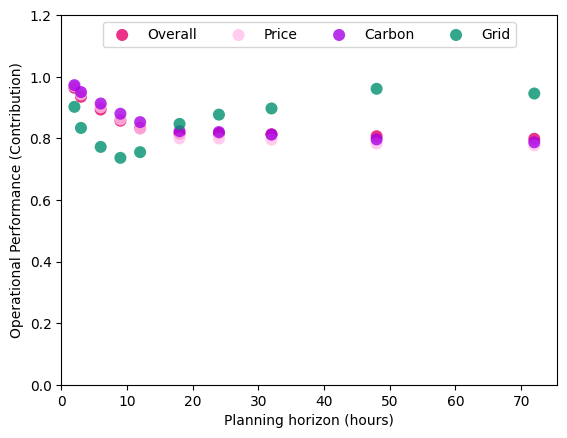

In [6]:
ymax=1.2

fig, ax = plt.subplots()
for i, col in enumerate(columns):
    ax.scatter(taus,planning_horizon_results[col],label=col,color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75)
plt.xlim(0)
plt.ylim(0,ymax)
plt.xlabel('Planning horizon (hours)')
plt.ylabel('Operational Performance (Contribution)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True)
plt.show()